In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier as xgb

import shap
import lime
import lime.lime_tabular

In [2]:
df = pd.read_csv("Iris Flower - Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df1 =df.copy()
df2 =df.copy()

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# The target Variable is PetalLengthCm

In [8]:
df.rename(columns={'Species':'Species_Value'},inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Value
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Chack Missing Values

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species_Value    0
dtype: int64

In [10]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species_Value     object
dtype: object

# Data inconsistencies & Data Preprocessing:

In [11]:
for col in df.columns:
    print(f"---###*** {col} ---###***")
    print(df[col].value_counts())

---###*** SepalLengthCm ---###***
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64
---###*** SepalWidthCm ---###***
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: SepalWidthCm, dtype: int64
---###*** PetalLengthCm ---###***
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.

# Handling NaN Values 

In [12]:
Num_cols = []
cat_cols = []
for col in df.columns:
    if df[col].dtypes == 'object':
        cat_cols.append(col)
    else:
        Num_cols.append(col)

In [13]:
#handle null values of numerical columns

for col in Num_cols:
    if df[col].isna:
        df[col].fillna(df[col].median(), inplace=True)

In [14]:
#handle null values of categorical columns

for col in cat_cols:
    if df[col].isnull:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species_Value    0
dtype: int64

# Outliers

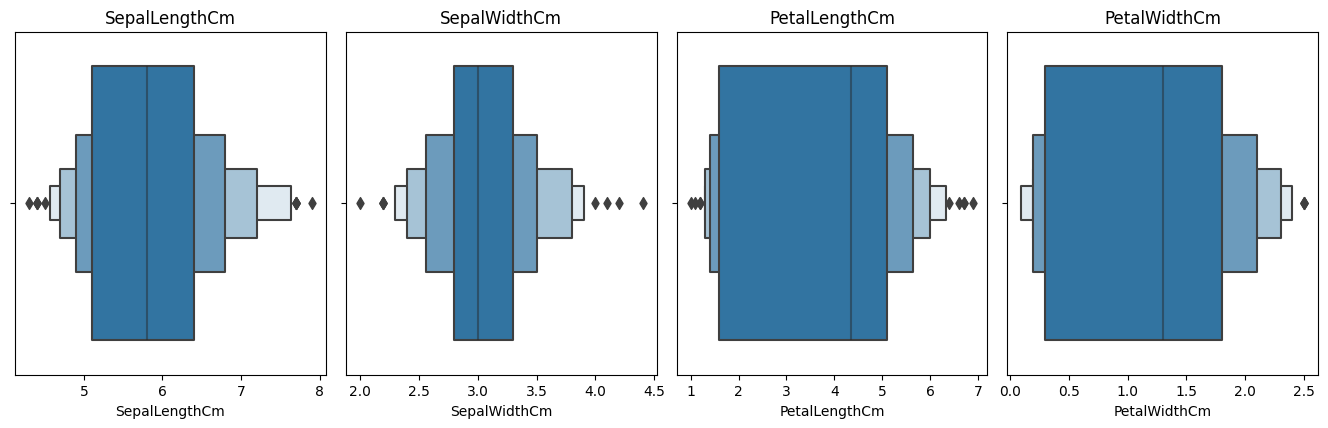

In [16]:
plt.figure(figsize=(20,20))
for ax, col in enumerate(Num_cols):
    plt.subplot(5,6, int(ax+1))
    plt.title(col)
    sns.boxenplot(x=df[col],hue=df['Species_Value'])
plt.tight_layout()
plt.show()

# Encoding target value

In [17]:
from sklearn.preprocessing import LabelEncoder
led =LabelEncoder()
led.fit_transform(df['Species_Value'])
df['Species_Value'] =led.fit_transform(df['Species_Value'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Value
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df.value_counts('Species_Value')

Species_Value
0    50
1    50
2    50
dtype: int64

# Model_Selection of ML

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Value
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Decision Tree Classifier

In [20]:
from sklearn import tree

In [21]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Value
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
x =df.drop('Species_Value',axis=1)
y =df['Species_Value']

# DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtc =DecisionTreeClassifier()

In [25]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [26]:
dtc.predict([[1,0,0,0]])

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


array([0])

In [27]:
dtc.predict([[0,0,0,1]])

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


array([0])

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

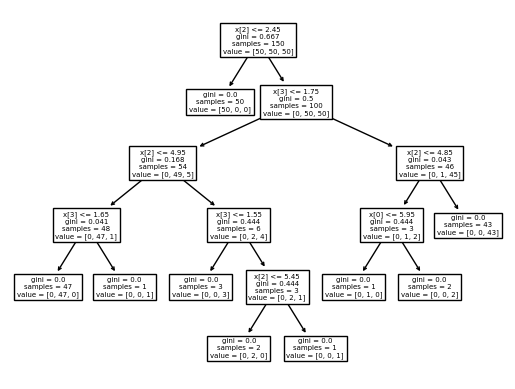

In [28]:
tree.plot_tree(dtc)

[Text(0.5, 0.9166666666666666, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'PetalLengthCm <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'PetalWidthCm <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'PetalWidthCm <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'PetalLengthCm <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 T

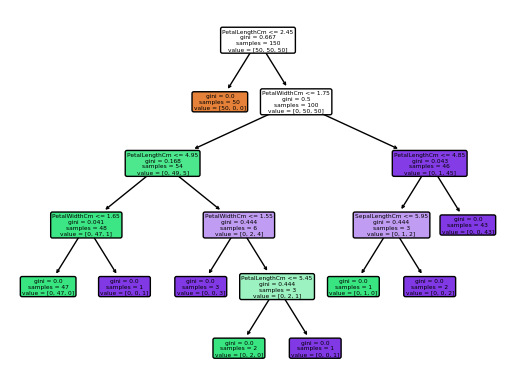

In [29]:
tree.plot_tree(dtc, rounded=True, filled=True,feature_names = x.columns )

# K-Nearest Neighbors (KNN)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knn = KNeighborsRegressor(n_neighbors=3)

In [32]:
knn.fit(df[["PetalLengthCm"]],df["Species_Value"])

KNeighborsRegressor(n_neighbors=3)

In [33]:
knn.predict([[15]])

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


array([2.])

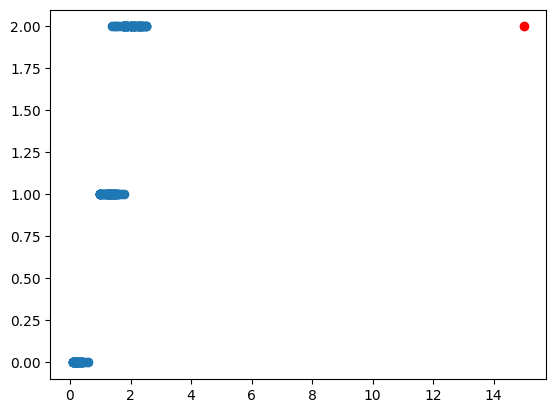

In [34]:
plt.scatter(df.PetalWidthCm, df.Species_Value)
plt.scatter(15,2, color="red")

# Logistic Regression


In [35]:
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df2.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [37]:
df2['Species'] = df2['Species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])

In [38]:
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
x=df2.drop('Species', axis=1)

In [40]:
y =df2[['Species']]

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
reg =LogisticRegression()

In [43]:
reg.fit(x,y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


LogisticRegression()

In [44]:
reg.coef_

array([[-0.4234002 ,  0.9616903 , -2.51936288, -1.08612842],
       [ 0.53407785, -0.31789737, -0.20537408, -0.93954425],
       [-0.11067765, -0.64379293,  2.72473696,  2.02567267]])

In [45]:
reg.intercept_

array([  9.88097006,   2.21928156, -12.10025163])

In [46]:
reg.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [47]:
reg.predict_proba(x)

array([[9.81804276e-01, 1.81957100e-02, 1.43460484e-08],
       [9.71802160e-01, 2.81978107e-02, 2.97679380e-08],
       [9.85495978e-01, 1.45040094e-02, 1.21748649e-08],
       [9.76424964e-01, 2.35749969e-02, 3.91821962e-08],
       [9.85398356e-01, 1.46016317e-02, 1.18853668e-08],
       [9.70381261e-01, 2.96186651e-02, 7.36250444e-08],
       [9.86930605e-01, 1.30693757e-02, 1.97677029e-08],
       [9.76445341e-01, 2.35546320e-02, 2.74313737e-08],
       [9.79977769e-01, 2.00222013e-02, 3.01443225e-08],
       [9.69264678e-01, 3.07352902e-02, 3.12962705e-08],
       [9.76465697e-01, 2.35342841e-02, 1.92046470e-08],
       [9.75509897e-01, 2.44900592e-02, 4.34927557e-08],
       [9.74675031e-01, 2.53249478e-02, 2.11985210e-08],
       [9.92023518e-01, 7.97647851e-03, 3.82662375e-09],
       [9.88115480e-01, 1.18845174e-02, 2.82138058e-09],
       [9.86674116e-01, 1.33258709e-02, 1.29085668e-08],
       [9.88048548e-01, 1.19514428e-02, 9.20169859e-09],
       [9.81540546e-01, 1.84594

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.3, random_state=42)

# LogisticRegression

In [49]:
LR_model = LogisticRegression()

In [50]:
LR_model.fit(xtrain, ytrain)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


LogisticRegression()

In [51]:
smote = SMOTE(random_state=42)
xtrain, ytrain = smote.fit_resample(xtrain, ytrain)

# RandomForestClassifier

In [52]:
RFC = RandomForestClassifier()

In [53]:
RFC.fit(xtrain, ytrain)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier()

# XGboost

In [54]:
XGB = xgb()

In [55]:
XGB.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# SVC

In [56]:
svc = SVC(kernel='rbf', gamma='scale', probability=True)

In [57]:
svc.fit(xtrain, ytrain)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SVC(probability=True)

# Predcting and Evaluation Metrics

In [58]:
trained_models = [
    LR_model,
    RFC,
    XGB,
    svc
]

	 ********* LogisticRegression *********
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
AUC Score:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


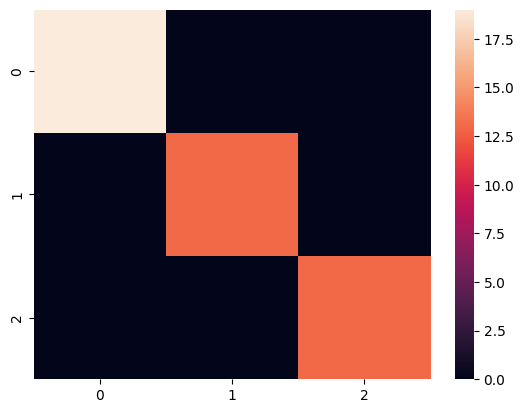

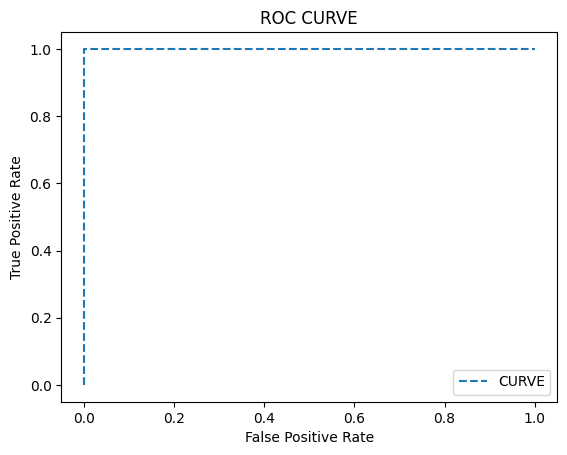

	 ********* RandomForestClassifier *********
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
AUC Score:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


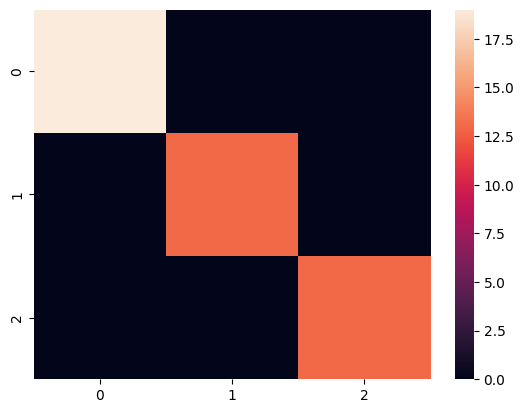

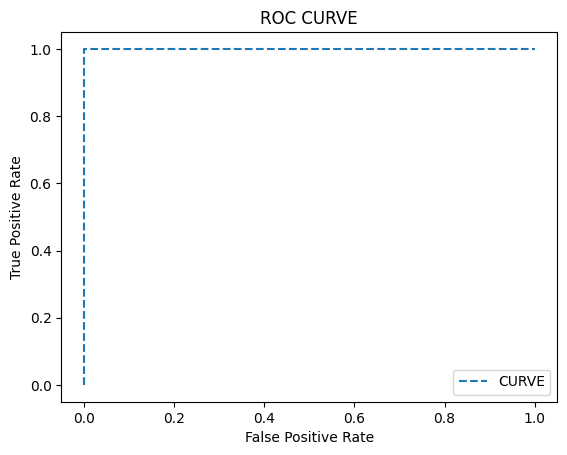

	 ********* XGBClassifier *********
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
AUC Score:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


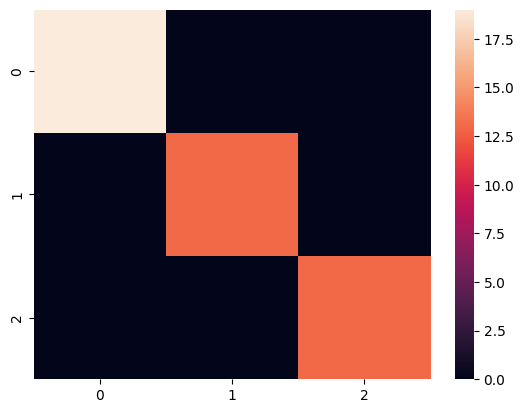

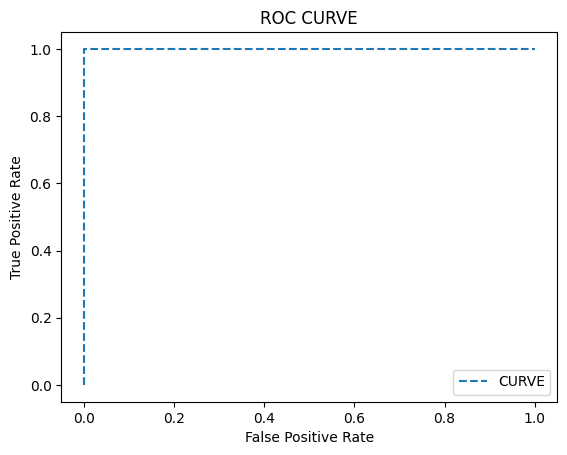

	 ********* SVC *********
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
AUC Score:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


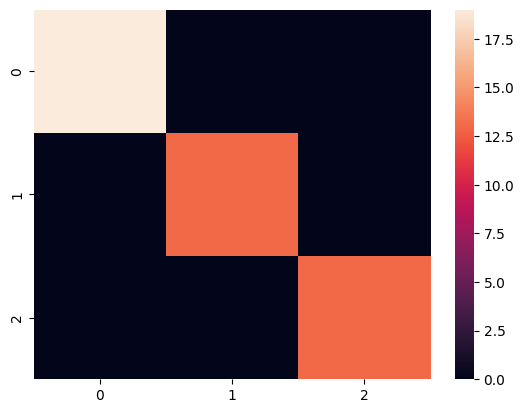

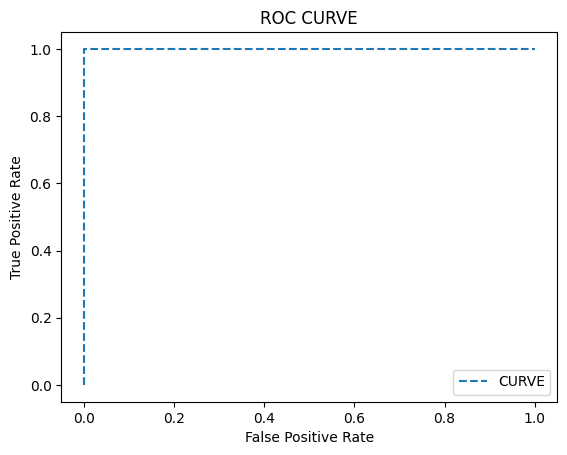

In [59]:
for model in trained_models:
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred, average='micro')
    recall = recall_score(ytest, y_pred, average='micro')
    f1 = f1_score(ytest,y_pred, average='micro')
    cm = confusion_matrix(ytest, y_pred)


    proba = model.predict_proba(xtest)
    auc = roc_auc_score(ytest,proba,multi_class='ovr')
    
    print(f"\t ********* {model.__class__.__name__} *********")
    print("Accuracy Score: ", accuracy)
    print("Precision Score: ", precision)
    print("Recall Score: ", recall)
    print("F1 Score: ", f1)
    print("AUC Score: ", auc)
    print("Confusion Matrix: \n", cm)
    sns.heatmap(cm)
    plt.show()

    fpr, tpr, thresold = roc_curve(ytest, proba[:,1], pos_label=1)
    plt.plot(fpr, tpr, linestyle="--", label="CURVE", )
    plt.title("ROC CURVE")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

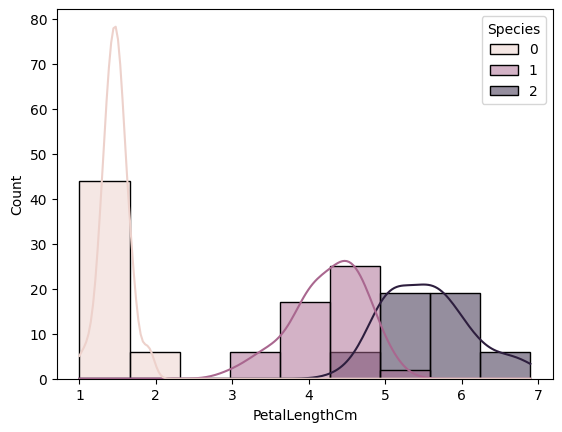

In [60]:
sns.histplot(x = "PetalLengthCm", data = df2, kde=True, hue="Species")

RandomForest Classifier has the highest accuracy. So we will use Gradient Boosting Classifier for hyper parameter tuning

Hyperparameter Tuning:

In [61]:
params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [62]:
model_param = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1.0, 5.0, 10.0],
            'kernel': ['rbf', 'linear']
        }
    },
    'LogReg': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1.0, 5.0, 10.0],
            'penalty': ['l1', 'l2'],
        }
    },
    'rf': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [20, 50, 100],
            'criterion': ['gini', 'entropy'],
            'min_samples_leaf' : [1, 2],
            'max_features': ['sqrt', 'log2']
        }
    },
    'XGboost': {
        'model': xgb(),
        'params': {
            'learning_rate': [0.1, 0.01, 0.2],
            'n_estimators': [20, 50, 100],
        }
    }
}

In [63]:
scores = []

for name, mp in model_param.items():
    RandomSearch = RandomizedSearchCV(estimator=mp['model'] , param_distributions=mp['params'], return_train_score=False, n_iter=1)
    RandomSearch.fit(xtrain, ytrain)
    scores.append({
        'model': mp['model'],
        'best_score': RandomSearch.best_score_,
        'best_param': RandomSearch.best_params_
    })

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [64]:
scores

[{'model': SVC(gamma='auto'),
  'best_score': 0.9549407114624506,
  'best_param': {'kernel': 'rbf', 'C': 10.0}},
 {'model': LogisticRegression(solver='liblinear'),
  'best_score': 0.9549407114624506,
  'best_param': {'penalty': 'l2', 'C': 10.0}},
 {'model': RandomForestClassifier(),
  'best_score': 0.9367588932806324,
  'best_param': {'n_estimators': 50,
   'min_samples_leaf': 1,
   'max_features': 'sqrt',
   'criterion': 'entropy'}},
 {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, m

Predict testing values with hyperparameter tuning

In [65]:
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=1, criterion='entropy')
rf.fit(xtrain, ytrain)
b_predicted = rf.predict(xtest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [66]:
accuracy_score(ytest, b_predicted)

1.0

In [67]:
accuracy = accuracy_score(ytest, b_predicted)
precision = precision_score(ytest, b_predicted, average='micro')
recall = recall_score(ytest, b_predicted, average='micro')
f1 = f1_score(ytest, b_predicted, average='micro')
cm = confusion_matrix(ytest, b_predicted)

In [68]:
print("Accuracy Score: ", accuracy)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)
print("AUC Score: ", auc)
print("Confusion Matrix: \n", cm)

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
AUC Score:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


<Axes: >

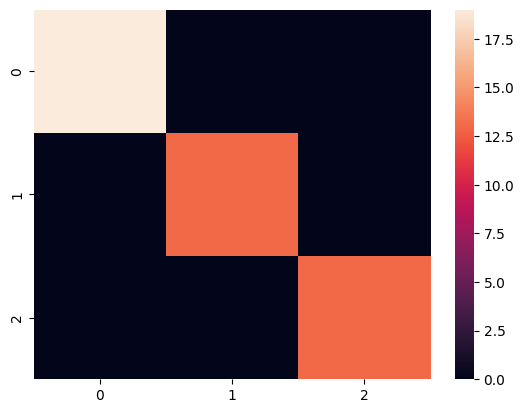

In [69]:
sns.heatmap(cm)

Interpretability:

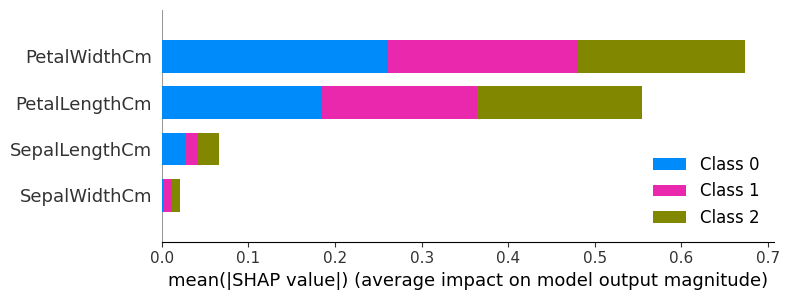

In [70]:
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(xtest)
shap.summary_plot(shap_values, xtest)